<a href="https://colab.research.google.com/github/digkioan/Neural-Network-Digit-Classification-Project/blob/main/AEM_4368_NEURAL_NETWORKS_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

# Setting Environment Seeds

Seeds enable the reproduction of the experiments.

In [45]:
random.seed(0)
np.random.seed(seed=0)
tf.random.set_seed(seed=0)

# Load MNIST Dataset using Tensorflow

In [46]:
(x_train, y_train), (x_test, y_test ) = tf.keras.datasets.mnist.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

print(
    f'Training Size - Inputs:{x_train.shape}, Targets:{y_train.shape}'
    f'\nTest Size - Inputs:{x_test.shape}, Targets:{y_test.shape}'
)

Training Size - Inputs:(60000, 28, 28), Targets:(60000,)
Test Size - Inputs:(10000, 28, 28), Targets:(10000,)


# Displaying Random Digits

In [20]:
rows = 5
digits_per_row = 5

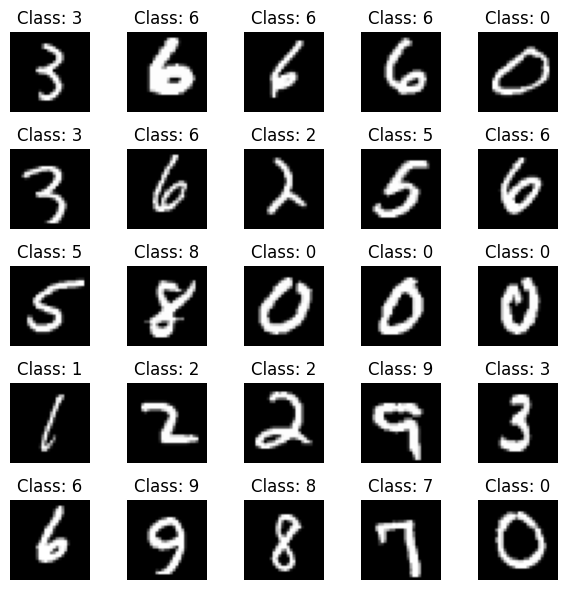

In [21]:
fig, axes = plt.subplots(nrows=rows, ncols=digits_per_row, figsize=(6, 6))
axes = axes.flatten()

# Selecting random ids from 0 to 60000
total_digits = rows*digits_per_row
random_ids= np.random.choice(x_train.shape[0], total_digits, replace=False)

# Plotting the selected digits.
for i, ax in enumerate(axes):
    idx = random_ids[i]
    ax.imshow(x_train[idx], cmap='gray')
    ax.set_title(f'Class: {y_train[idx]}')
    ax.axis('off')
plt.tight_layout()
plt.show()

# Preprocessing Inputs


*   Deep Neural Networks require vectors are inputs. Since the digits are 28x28
*   One-hot Encoding is required for targets, since we use 10 classes. (e.g. 0 will be classified as 0 0 0 0 0 0 0 0 0 1, one will be classified as 0 0 0 0 0 0 0 0 1 0, etc.

grayscale images, they should be converted to vectors of 784 size.

In [33]:
x_train = x_train.reshape((60000, 784))
y_train = tf.one_hot(y_train, depth=10)
x_test = x_test.reshape((10000, 784))
y_test = tf.one_hot(y_test, depth=10)

print(
    f'Training Size - Inputs:{x_train.shape}, Targets:{y_train.shape}'
    f'\nTest Size - Inputs:{x_test.shape}, Targets:{y_test.shape}'
)

Training Size - Inputs:(60000, 784), Targets:(60000, 10)
Test Size - Inputs:(10000, 784), Targets:(10000, 10)


# Construct Deep Neural Network





*   Input: 784 Features
*   Hiddens: 2 Hiddens of 256 units, which pass through tanh activation.
*   Output: 10 probabilities (1 for each class). Softmax activation is required to convert the network's outputs into probabilities.



In [8]:
activation = 'tanh'
loss = 'categorical_crossentropy' # Do not change this loss function.
metrics = ['accuracy']
learning_rate = 0.001
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate) # Do not change this optimizer.
epochs = 10

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(784,), name='input'),
    tf.keras.layers.Dense(units=256, activation=activation, name='hidden-1'),
    tf.keras.layers.Dense(units=256, activation=activation, name='hidden-2'),
    tf.keras.layers.Dense(units=10, activation='softmax', name='outputs') # Do not change this activation function.
])
model.summary(expand_nested=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden-1 (Dense)            (None, 256)               200960    
                                                                 
 hidden-2 (Dense)            (None, 256)               65792     
                                                                 
 outputs (Dense)             (None, 10)                2570      
                                                                 
Total params: 269322 (1.03 MB)
Trainable params: 269322 (1.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
history = model.fit(
    x=x_train,
    y=y_train,
    epochs=epochs,
    validation_data=(x_test, y_test)
)

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.9145 - accuracy: 0.7390 - val_loss: 0.5102 - val_accuracy: 0.8644
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4533 - accuracy: 0.8753 - val_loss: 0.3886 - val_accuracy: 0.8947
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3655 - accuracy: 0.8984 - val_loss: 0.3359 - val_accuracy: 0.9069
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3205 - accuracy: 0.9094 - val_loss: 0.2976 - val_accuracy: 0.9157
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2892 - accuracy: 0.9173 - val_loss: 0.2835 - val_accuracy: 0.9191
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2713 - accuracy: 0.9221 - val_loss: 0.2642 - val_accuracy: 0.9237
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2484 - accuracy: 0.9289 - val_loss: 0.2486 - val_ac

# Display Loss and Accuracy per Training Epoch

In [12]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

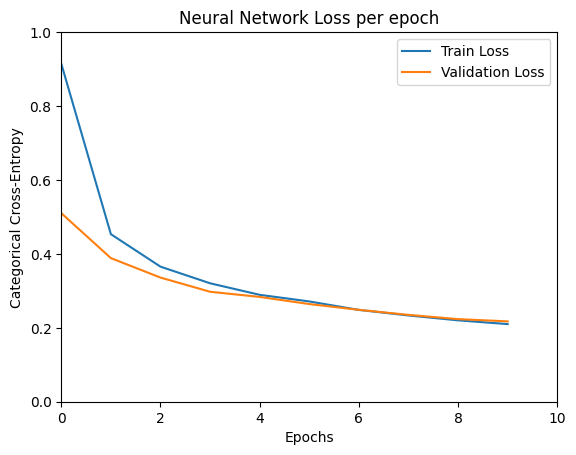

In [13]:
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Neural Network Loss per epoch')
plt.ylabel('Categorical Cross-Entropy')
plt.xlabel('Epochs')
plt.xlim(0, epochs)
plt.ylim(0, 1)
plt.legend()
plt.show()

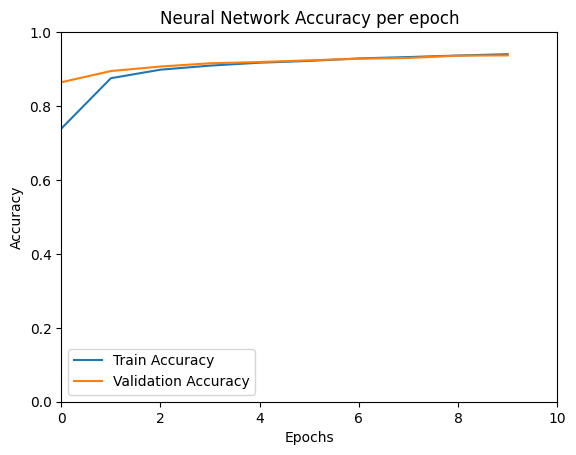

In [14]:
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Neural Network Accuracy per epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.xlim(0, epochs)
plt.ylim(0, 1)
plt.legend()
plt.show()

# --- TODOs ---

## 1. Hyperparameter Tuning: Try adjusting number of hidden layers, hidden units, activation function, learning rate, number of epochs, etc.


In [34]:
def create_model(hidden_layers, hidden_units, activation, learning_rate):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Input(shape=(784,), name='input'))

    for units in hidden_units:
        model.add(tf.keras.layers.Dense(units=units, activation=activation))

    model.add(tf.keras.layers.Dense(units=10, activation='softmax', name='outputs'))

    optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model


suggested_combinations = [
    {'hidden_layers': 2, 'hidden_units': [256, 128], 'activation': 'relu', 'learning_rate': 0.001, 'epochs': 50},
    {'hidden_layers': 3, 'hidden_units': [128, 128, 64], 'activation': 'tanh', 'learning_rate': 0.01, 'epochs': 100},
    {'hidden_layers': 2, 'hidden_units': [512, 256], 'activation': 'relu', 'learning_rate': 0.0005, 'epochs': 200},
    {'hidden_layers': 3, 'hidden_units': [256, 256, 128], 'activation': 'relu', 'learning_rate': 0.005, 'epochs': 100},
    {'hidden_layers': 1, 'hidden_units': [128], 'activation': 'sigmoid', 'learning_rate': 0.01, 'epochs': 50}
]


for i, combination in enumerate(suggested_combinations):
    print(f"\nTraining Model {i+1}/{len(suggested_combinations)}")
    print("-----------------------------------------------------")

    hidden_layers = combination['hidden_layers']
    hidden_units = combination['hidden_units']
    activation = combination['activation']
    learning_rate = combination['learning_rate']
    epochs = combination['epochs']

    print("Hyperparameters:")
    print(f"Hidden Layers: {hidden_layers}")
    print(f"Hidden Units: {hidden_units}")
    print(f"Activation: {activation}")
    print(f"Learning Rate: {learning_rate}")
    print(f"Epochs: {epochs}")
    print("-----------------------------------------------------")

    model = create_model(hidden_layers, hidden_units, activation, learning_rate)
    model.summary()

    history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test), verbose=2)


Training Model 1/5
-----------------------------------------------------
Hyperparameters:
Hidden Layers: 2
Hidden Units: [256, 128]
Activation: relu
Learning Rate: 0.001
Epochs: 50
-----------------------------------------------------
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 256)               200960    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 outputs (Dense)             (None, 10)                1290      
                                                                 
Total params: 235146 (918.54 KB)
Trainable params: 235146 (918.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
1875/1875 - 8s - loss: 1.1805 -

In [48]:
def create_model(hidden_layers, hidden_units, activation, learning_rate):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Input(shape=(784,), name='input'))

    for units in hidden_units:
        model.add(tf.keras.layers.Dense(units=units, activation=activation))

    model.add(tf.keras.layers.Dense(units=10, activation='softmax', name='outputs'))

    optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

new_combinations = [
    {'hidden_layers': 2, 'hidden_units': [256, 128], 'activation': 'relu', 'learning_rate': 0.001, 'epochs': 20},
    {'hidden_layers': 2, 'hidden_units': [256, 256], 'activation': 'relu', 'learning_rate': 0.01, 'epochs': 25},
    {'hidden_layers': 2, 'hidden_units': [256, 512], 'activation': 'relu', 'learning_rate': 0.001, 'epochs': 30},
    {'hidden_layers': 2, 'hidden_units': [512, 256], 'activation': 'relu', 'learning_rate': 0.01, 'epochs': 25}
]

for i, combination in enumerate(new_combinations):
    print(f"\nTraining Model {i+1}/{len(new_combinations)}")
    print("-----------------------------------------------------")

    hidden_layers = combination['hidden_layers']
    hidden_units = combination['hidden_units']
    activation = combination['activation']
    learning_rate = combination['learning_rate']
    epochs = combination['epochs']

    print("Hyperparameters:")
    print(f"Hidden Layers: {hidden_layers}")
    print(f"Hidden Units: {hidden_units}")
    print(f"Activation: {activation}")
    print(f"Learning Rate: {learning_rate}")
    print(f"Epochs: {epochs}")
    print("-----------------------------------------------------")

    model = create_model(hidden_layers, hidden_units, activation, learning_rate)
    model.summary()

    history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test), verbose=2)



Training Model 1/4
-----------------------------------------------------
Hyperparameters:
Hidden Layers: 2
Hidden Units: [256, 128]
Activation: relu
Learning Rate: 0.001
Epochs: 20
-----------------------------------------------------
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 256)               200960    
                                                                 
 dense_21 (Dense)            (None, 128)               32896     
                                                                 
 outputs (Dense)             (None, 10)                1290      
                                                                 
Total params: 235146 (918.54 KB)
Trainable params: 235146 (918.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
1875/1875 - 9s - loss: 1.7599 

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden-1 (Dense)            (None, 512)               401920    
                                                                 
 hidden-2 (Dense)            (None, 256)               131328    
                                                                 
 outputs (Dense)             (None, 10)                2570      
                                                                 
Total params: 535818 (2.04 MB)
Trainable params: 535818 (2.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/25
1875/1875 [==============================] - 16s 8ms/step - loss: 0.5666 - accuracy: 0.8579 - val_loss: 0.2956 - val_accuracy: 0.9171
Epoch 2/25
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2720 - accuracy: 0.9225 - val_loss: 0.2353 - val_accuracy

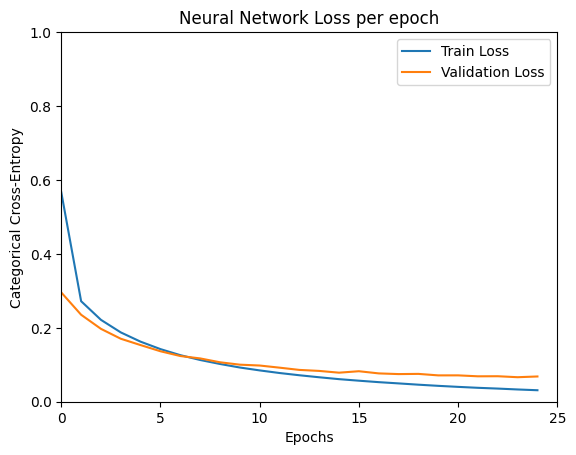

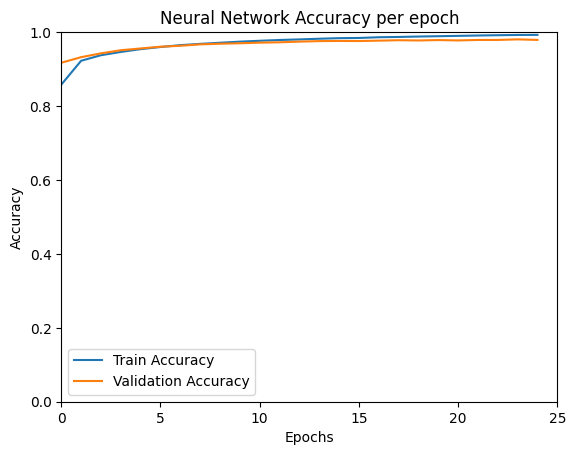

In [49]:
activation = 'relu'
loss = 'categorical_crossentropy' # Do not change this loss function.
metrics = ['accuracy']
learning_rate = 0.01
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate) # Do not change this optimizer.
epochs = 25

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(784,), name='input'),
    tf.keras.layers.Dense(units=512, activation=activation, name='hidden-1'),
    tf.keras.layers.Dense(units=256, activation=activation, name='hidden-2'),
    tf.keras.layers.Dense(units=10, activation='softmax', name='outputs') # Do not change this activation function.
])
model.summary(expand_nested=True)


model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
history = model.fit(
    x=x_train,
    y=y_train,
    epochs=epochs,
    validation_data=(x_test, y_test)
)


train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Neural Network Loss per epoch')
plt.ylabel('Categorical Cross-Entropy')
plt.xlabel('Epochs')
plt.xlim(0, epochs)
plt.ylim(0, 1)
plt.legend()
plt.show()

plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Neural Network Accuracy per epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.xlim(0, epochs)
plt.ylim(0, 1)
plt.legend()
plt.show()

## 2. Validation: Show 1 misclassified digit from each class.

## 3. Suggest & Implement workflow improvements, aside hyperparameter tuning. Can you think of any ways to increase the overall accuracy of the Neural Network?

Epoch 1/25
1875/1875 - 19s - loss: 0.8330 - accuracy: 0.7388 - val_loss: 0.3243 - val_accuracy: 0.9072 - 19s/epoch - 10ms/step
Epoch 2/25
1875/1875 - 13s - loss: 0.4223 - accuracy: 0.8738 - val_loss: 0.2476 - val_accuracy: 0.9270 - 13s/epoch - 7ms/step
Epoch 3/25
1875/1875 - 13s - loss: 0.3364 - accuracy: 0.9002 - val_loss: 0.2061 - val_accuracy: 0.9381 - 13s/epoch - 7ms/step
Epoch 4/25
1875/1875 - 13s - loss: 0.2906 - accuracy: 0.9134 - val_loss: 0.1782 - val_accuracy: 0.9464 - 13s/epoch - 7ms/step
Epoch 5/25
1875/1875 - 13s - loss: 0.2555 - accuracy: 0.9253 - val_loss: 0.1625 - val_accuracy: 0.9506 - 13s/epoch - 7ms/step
Epoch 6/25
1875/1875 - 13s - loss: 0.2304 - accuracy: 0.9306 - val_loss: 0.1450 - val_accuracy: 0.9556 - 13s/epoch - 7ms/step
Epoch 7/25
1875/1875 - 13s - loss: 0.2110 - accuracy: 0.9369 - val_loss: 0.1320 - val_accuracy: 0.9595 - 13s/epoch - 7ms/step
Epoch 8/25
1875/1875 - 15s - loss: 0.1965 - accuracy: 0.9412 - val_loss: 0.1242 - val_accuracy: 0.9614 - 15s/epoch - 

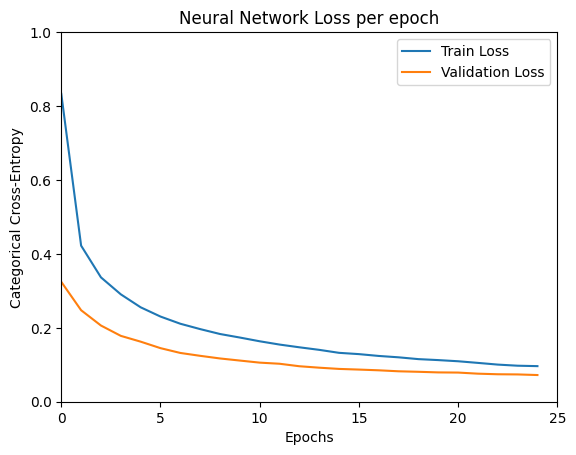

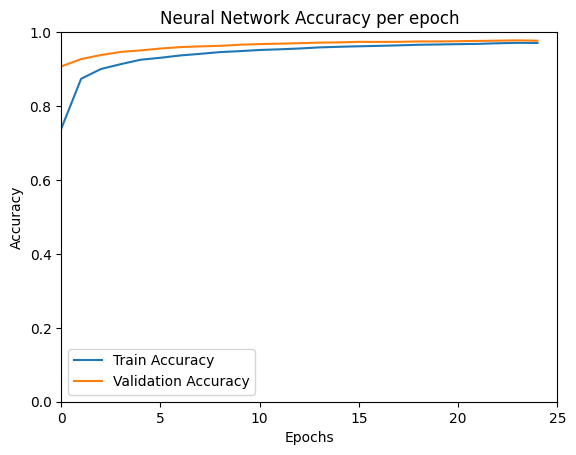

In [50]:
activation = 'relu'
loss = 'categorical_crossentropy'
metrics = ['accuracy']
learning_rate = 0.01
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
epochs = 25

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(784,), name='input'),
    tf.keras.layers.Dense(units=512, activation=activation, name='hidden-1'),
    tf.keras.layers.Dropout(0.5),  #dropout rate of 0.5
    tf.keras.layers.Dense(units=256, activation=activation, name='hidden-2'),
    tf.keras.layers.Dropout(0.5),  #dropout rate of 0.5
    tf.keras.layers.Dense(units=10, activation='softmax', name='outputs')
])


model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test), verbose=2)


train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Neural Network Loss per epoch')
plt.ylabel('Categorical Cross-Entropy')
plt.xlabel('Epochs')
plt.xlim(0, epochs)
plt.ylim(0, 1)
plt.legend()
plt.show()

plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Neural Network Accuracy per epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.xlim(0, epochs)
plt.ylim(0, 1)
plt.legend()
plt.show()

## 4. Upload the exercise in your GitHub repository. Google Colab can instantly deploy this notebook into a Github repository.

## 5. Write a README file in your github repository, explaining:

1. Your workflow
2. The final model architecture
3. The selected hyperparameters
4. Include the requirements.txt file, which shows the python version, as well as the library versions.

In [ ]:
!pip show tensorflow

Name: tensorflow
Version: 2.15.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tf_keras
